## Atividade Prática 1: Amostragem e rebatimento

### Nome: Ciro B Rosa

### N⁰ USP: 2320769

Nessa tarefa exploraremos a amostragem de sinais e imagens sintetizados a partir de funções senoidais, e o efeito de rebatimento resultante da relação entre a taxa de amostragem e a frequência do sinal.

#### Dependências dessa tarefa

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

#### Exercício 1:

(a) construa um sinal de 1 seg de duração com frequência f = 4000 Hz e taxa de amostragem R = 40000 Hz:

$$x(t) = \sin(2\pi f t)\quad\quad t=0,\frac{1}{R},\frac{2}{R},\ldots,1-\frac{1}{R}$$

(b) Plote um trecho do sinal correspondente a 5 períodos completos (ou seja, quando $2\pi ft=5\cdot 2\pi$).

(c) Adicione um widget para reproduzir o sinal (já resolvido).

In [2]:
# Exercício 1(a)
# Dicas: não use laços! Use np.arange para construir um vetor t
# e passe uma expressão com o vetor t para a função np.sin
f = 4000                                  # (frequencia do sinal - hertz)
R = 40000                                 # (frequencia de amostragem - amostras/s ou hertz)

t0 = 0                                    # (tempo inicial do sinal sintetizado - s)
tf = 1                                    # (duração do sinal sintetizado - s)
nsamples = int(R  * (tf - t0))            # (número de amostras no intervalo de tempo - amostras)
dt = (tf - t0) / nsamples                 # (intervalo de tempo entre amostras - s)

t_1 = np.arange(t0, tf, step = dt)
x_1 = np.sin(2 * m.pi * f * t_1)


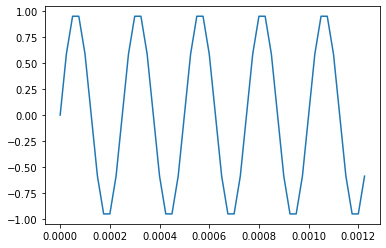

In [3]:
# Exercício 1(b)
# Dica: use plt.plot(tempo,sinal)
nper = 5                                  # número de períodos a apresentar
npontos_1 = int(nper * R / f)             # números de pontos (amostras) correspondentes ao período

plt.plot(t_1[:npontos_1], x_1[:npontos_1])


In [4]:
# Exercício 1(c) resolvido
display(Audio(x_1, rate=R))

#### Exercício 2:

Repita a construção do exercício 1 com a mesma frequência e taxa de amostragem R = 10000 Hz. Comente na célula após o código as diferenças visuais e auditivas observadas, se houver.

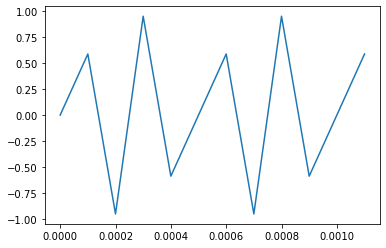

In [5]:
# Exercício 2
R = 10000                                 # (frequencia de amostragem - amostras/s ou hertz)
nsamples = R  * (tf - t0)                 # (número de amostras no intervalo de tempo - amostras)
dt = (tf - t0) / nsamples                 # (intervalo de tempo entre amostras - s)

t_2 = np.arange(t0, tf, step = dt)
x_2 = np.sin(2 * m.pi * f * t_2)

nper = 5                                  # número de períodos a apresentar
npontos_2 = int(nper * R / f)              # números de pontos (amostras) correspondentes ao período
plt.plot(t_2[:npontos_2], x_2[:npontos_2])

display(Audio(x_2, rate=R))

#### Inclua aqui os comentários referentes ao exercício 2

#### Exercício 3:

Repita a construção do exercício 1 com a mesma frequência e taxa de amostragem R = 5000 Hz. Comente na célula após o código as diferenças visuais e auditivas observadas, se houver.

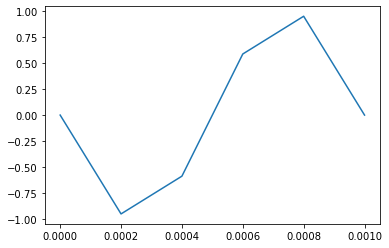

In [6]:
# Exercício 3
R = 5000                                  # (frequencia de amostragem - amostras/s ou hertz)
nsamples = R  * (tf - t0)                 # (número de amostras no intervalo de tempo - amostras)
dt = (tf - t0) / nsamples                 # (intervalo de tempo entre amostras - s)

t_3 = np.arange(t0, tf, step = dt)
x_3 = np.sin(2 * m.pi * f * t_3)

nper = 5                                  # número de períodos a apresentar
npontos_3 = int(nper * R / f)              # números de pontos (amostras) correspondentes ao período
plt.plot(t_3[:npontos_3], x_3[:npontos_3])

display(Audio(x_3, rate=R))

#### Inclua aqui os comentários referentes ao exercício 3

#### Exercício 4:

(a) Construa um gráfico sobrepondo as formas de onda dos exercícios 1 e 3

(b) Estime a frequência aparente do sinal produzido no ex. 3 a partir do gráfico do item (a)

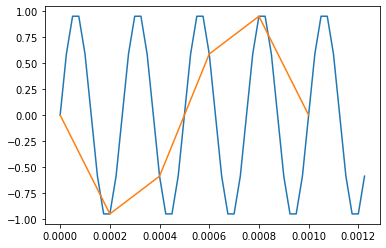

In [7]:
# Exercício 4(a)
# Dica: basta fazer chamadas consecutivas da função plt.plot()
plt.plot(t_1[:npontos_1], x_1[:npontos_1])
plt.plot(t_3[:npontos_3], x_3[:npontos_3])
plt.show()

#### Inclua aqui os comentários referentes ao exercício 4(b)

## Explicação: o fenômeno do rebatimento

**O problema:** existem infinitos valores de $f$ e $g$ tais que

$$\sin\left(2\pi f\frac{n}{R}\right) = \sin\left(2\pi g\frac{n}{R}\right), \forall n\in\mathbb{Z}$$

Para essa condição valer, basta que os argumentos das senoides acima correspondam sempre a ângulos equivalentes. Isso ocorre, por exemplo, quando

$$2\pi f\frac{n}{R} = 2\pi g\frac{n}{R} + k\cdot 2\pi\cdot n$$

para *algum* $k\in\mathbb{Z}$ e para *qualquer* $n\in\mathbb{Z}$. A condição acima equivale a

$$f-g = kR.$$

A mesma condição vale para que dois cossenos de frequências $f$ e $g$ produzam a mesma lista de amostras, e analogamente para duas exponenciais complexas de frequências f e g:

$$\begin{array}{cl}
e^{i2\pi f\frac{n}{R}} = e^{i2\pi g\frac{n}{R}}, \forall n\in\mathbb{Z}\\
\Updownarrow\\
e^{i2\pi (f-g)\frac{n}{R}}=1, \forall n\in\mathbb{Z}\\
\Updownarrow\\
e^{i2\pi (f-g)\frac{n}{R}}=e^{i2\pi n}, \forall n\in\mathbb{Z}&\left(\mbox{obs:}\ e^{i2\pi n}=(e^{i2\pi})^n=1^n\right)\\
\Updownarrow\\
\forall n\in\mathbb{Z}\quad\exists k\in\mathbb{Z}: 2\pi (f-g)\frac{n}{R} = k2\pi n\\
\Updownarrow\\
\exists k\in\mathbb{Z}: f-g = kR & \left(\mbox{obs:}\ \exists k\ \mbox{para}\ n=1 \implies 2\pi (f-g)\frac{1}{R} = k2\pi\right).
\end{array}
$$

Assim, ao utilizarmos uma taxa de amostragem R, todas as senoides e/ou exponenciais com frequências

$$g=\ldots,f-3R,f-2R,f-R,f,f+R,f+2R,f+3R\ldots$$

gerarão a mesma lista de amostras que aquela com frequência $f$.

### Aliasing traz duas implicações importantes:

> - implicação física/perceptual: ao se amostrar um sinal analógico com taxa de amostragem $R$, perde-se a capacidade de discernir frequências separadas por múltiplos de $R$, e em particular os valores que não estão na faixa $-\frac{R}{2}<f\le \frac{R}{2}$ serão representados incorretamente (rebatidos), correspondendo a alguma outra frequência (aparente) que pertence à faixa representável.

> - implicação matemática: para se analisar um sinal a $R$ Hz, basta considerar frequências na faixa $-\frac{R}{2}<f\le \frac{R}{2}$.

Essas implicações ilustram a condição de Shannon-Nyquist, que afirma que para representar corretamente componentes senoidais de até $F$ Hz é necessário utilizar uma taxa de amostragem $R\ge 2F$ Hz. Elas também explicam a necessidade de utilização de filtros passa-baixas na conversão analógico-digital.



#### Exercício 5:

Calcule a frequência aparente $f$ na faixa $-\frac{R}{2}<f\le \frac{R}{2}$ que corresponde exatamente ao sinal digital gerado no exercício 3, justificando suas contas no contexto da discussão acima.

#### Inclua aqui as contas e comentários referentes ao exercício 5

#### Exercício 6:

Considere a função

$$f(x,y)=\sin(2\pi(50x+70y))$$

definida no retângulo $(x,y)\in[0,1]\times[0,1]$. O código abaixo contrói as imagens correspondentes a essa função, usando taxas de amostragem iguais nas duas variáveis com os valores $R=50,60,70,80,700$ (ciclos por unidade espacial).

Justifique na célula após o código os padrões observados em função das frequências aparentes $f_x$ e $f_y$ conforme a discussão acima. Considere que as frequências nominais $g_x=50$ e $g_y=70$ correspondem às flutuações horizontais e verticais, respectivamente.

In [ ]:
R=[50,60,70,80,700]
for j in range(len(R)):
    x = np.arange(0,1,1/R[j])
    y = np.arange(0,1,1/R[j])
    # np.meshgrid(x,y) retorna duas matrizes X e Y
    # onde cada linha de X contém uma cópia do vetor x
    # e cada coluna de Y uma cópia do vetor y.
    X, Y = np.meshgrid(x,y)
    f = np.sin(2 * m.pi * (50*X + 70*Y))
    plt.figure(figsize=(10,10))
    # origin="lower" converte a orientação das linhas da matriz para a orientação usual do eixo y no R²
    plt.imshow(f, origin="lower", interpolation="none", cmap='gray', vmin=-1, vmax=+1)

#### Inclua aqui as contas e comentários referentes ao exercício 6: